In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('Data_COVID19_Indonesia.csv')
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [4]:
x = df[['Total Cases', 'Total Deaths', 'Total Recovered']]
y = df['Population']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
model_regresi = LinearRegression()
model_regresi.fit(x_train, y_train)
model_regresi_pred = model_regresi.predict(x_test)

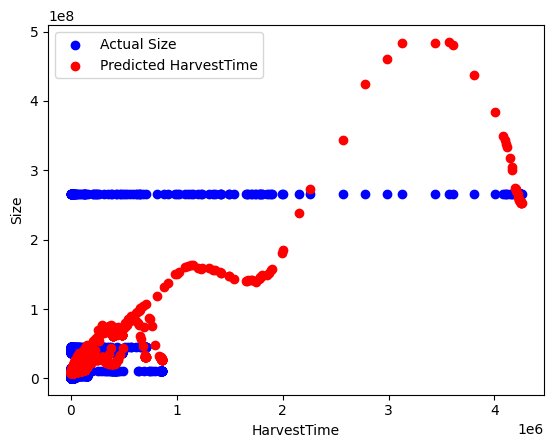

In [7]:
plt.scatter(x_test.iloc[:, 0], y_test, label='Actual Size', color='blue')
plt.scatter(x_test.iloc[:, 0], model_regresi_pred, label='Predicted HarvestTime', color='red')
plt.ylabel('Size')
plt.xlabel('HarvestTime')
plt.legend()
plt.show()

In [8]:
mae = mean_absolute_error(y_test, model_regresi_pred)
print(f"Mean Absolute Error (MAE): {mae: .2f}")

mse = mean_squared_error(y_test, model_regresi_pred)
print(f"Mean Squared Error (MSE): {mse: .2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse: .2f}")

Mean Absolute Error (MAE):  12052804.38
Mean Squared Error (MSE):  1114995514807158.62
Root Mean Squared Error (RMSE):  33391548.55


In [9]:
import pickle
filename = "model_prediksi_covid_indonesia.sav"
pickle.dump(model_regresi, open(filename, 'wb'))